# Data Regression

1. this report aims to estimate the low salary of each job
2. The following features are provided:
    - Job Title, Rating, Company Name, Location, Headquarters, Type of ownership, Industry, Sector, upper_bound Minimum Size, Maximum Size, Domain
3. The regressors onclude:
    - Linear regressor, Lasso regressor, Ridge regressor, Polynomial regressor, Random forest regressor, Random forest regressor with cross validation, and Gradient boost with cross validation.

In [1]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

# ------------------------ PREPARE THE DATA------------------------

##### 1. Load df

In [2]:
df_scientist = pd.read_excel("Cleaned_DataScientist.xlsx", engine='openpyxl')
df_analyst = pd.read_excel("Cleaned_DataAnalyst.xlsx", engine='openpyxl')
df_engineer = pd.read_excel("Cleaned_DataEngineer.xlsx", engine='openpyxl')

##### 2. Add domain for regression

In [3]:
df_scientist['Domain'] = 'Scientist'
df_analyst['Domain'] = 'Analyst'
df_engineer['Domain'] = 'Engineer'

In [4]:
# Combine three dataframes
df_all = pd.concat([df_scientist, df_analyst, df_engineer], ignore_index=True, sort=False)
df_all = df_all[["Job Title", "Rating", "Company Name", "Location", "Headquarters", "Type of ownership", "Industry", "Sector", "lower_salary", "upper_bound", "Minimum Size", "Maximum Size", "Domain"]]
df_all = df_all.dropna()
df_all.head(5)

,Job Title,Rating,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,lower_salary,upper_bound,Minimum Size,Maximum Size,Domain
0,Senior Data Scientist,3.5,Hopper,"New York, NY","Montreal, Canada",Company - Private,Travel Agencies,Travel & Tourism,111000.0,181000,501,1000.0,Scientist
1,"Data Scientist, Product Analytics",4.5,Noom US,"New York, NY","New York, NY",Company - Private,"Health, Beauty, & Fitness",Consumer Services,111000.0,181000,1001,5000.0,Scientist
2,Data Science Manager,-1.0,Decode_M,"New York, NY","New York, NY",Unknown,-1,-1,111000.0,181000,1,50.0,Scientist
3,Data Analyst,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",Company - Private,Internet,Information Technology,111000.0,181000,201,500.0,Scientist
4,"Director, Data Science",3.4,United Entertainment Group,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,111000.0,181000,51,200.0,Scientist


##### 3. Set y_df to lower_salary (regression goal)

In [5]:
y_df = df_all['lower_salary']

#####  4. Encode x_label

In [6]:
x_df = df_all[["Job Title", "Rating", "Company Name", "Location", "Headquarters", "Type of ownership", "Industry", "Sector", "Domain"]]
x_df = x_df.apply(LabelEncoder().fit_transform)
x_df.head(5)

,Job Title,Rating,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,Domain
0,3108,22,1416,204,476,2,101,25,2
1,1457,32,2129,204,508,2,53,8,2
2,1275,0,894,204,508,14,0,0,2
3,688,21,2641,175,424,2,61,13,2
4,1639,21,3208,204,508,2,2,6,2


##### 5. Perform train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=0)

# --------------------------EVALUATION FUNCTIONS---------------------

For the evaluation, we print out:
1. MAE: mean absolute error
2. MSE: mean squared error
3. RMSE: root mean squared error
4. R2 Square

In [8]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# -------------------------------RESULT--------------------------------------

### 1.  Linear regression

##### 1.1 Define a linear regression regressor

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

##### 1.2 Print coefficient b0

In [10]:
print(lin_reg.intercept_)

43550.231293654564


##### 1.3 Print the coefficient of each feature

In [11]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Job Title,0.772600
Rating,118.613593
Company Name,0.293356
Location,58.593903
Headquarters,-0.088944
Type of ownership,-265.171185
Industry,-40.787790
Sector,331.489815
Domain,12548.612079


##### 1.4 Plot the difference between the prediction and the result

Text(0.5, 6.79999999999999, 'Prediction difference')

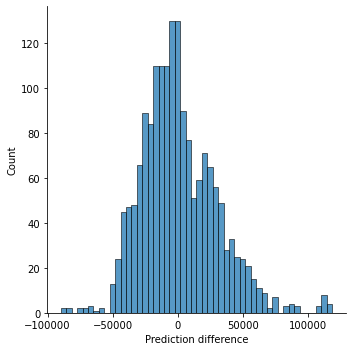

In [12]:
pred = lin_reg.predict(X_test)
sns.displot((y_test - pred), bins=50)
plt.xlabel("Prediction difference")

##### 1.5 Print the evaluation

In [13]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22454.195288904106
MSE: 855588183.1285831
RMSE: 29250.43902454428
R2 Square 0.17461514936254907
Train set evaluation:
_____________________________________
MAE: 22884.64521932233
MSE: 855808633.6683408
RMSE: 29254.207110573698
R2 Square 0.1380682772950853


In [14]:
evaluate_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,22454.195289,8.555882e+08,29250.439025,0.174615,"[0.029187509647660148, 0.03914355523014623, -0..."


### 2. Lasso regressor

Define a lasso regressor and print the evaluation

In [15]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(X_train, y_train)

test_pred = lasso_reg.predict(X_test)
train_pred = lasso_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22454.208774310406
MSE: 855588554.6667238
RMSE: 29250.445375527597
R2 Square 0.17461479094016907
Train set evaluation:
_____________________________________
MAE: 22884.652092090888
MSE: 855808633.6850808
RMSE: 29254.20711085981
R2 Square 0.13806827727822557


### 3. Ridge regressor

Define a ridge regressor and print the evaluation

In [16]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

test_pred = ridge_reg.predict(X_test)
train_pred = ridge_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22454.483476514415
MSE: 855596486.9420215
RMSE: 29250.58096759826
R2 Square 0.17460713868410616
Train set evaluation:
_____________________________________
MAE: 22884.770095606673
MSE: 855808638.5836905
RMSE: 29254.207194584687
R2 Square 0.13806827234456753


### 4. Polynomial regression

Define a polynomial regressor (8 degree) and print the evaluation

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=8)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 21281608481671.64
MSE: 7.654244468078302e+27
RMSE: 87488539067001.81
R2 Square -7.384040069283988e+18
Train set evaluation:
_____________________________________
MAE: 1312.0322976618704
MSE: 21285057.972730864
RMSE: 4613.57323261817
R2 Square 0.9785626529523658


##### 4. 1 Conclusion

The result demonstrates a clear overfitting outcome, and therefore Polynomial regressors with high degrees should be avoided.

### 5. Random forest regressor

Define a random forest regressor and print the evaluation

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18089.560418105102
MSE: 606572143.35753
RMSE: 24628.685376152946
R2 Square 0.41484061161846153
Train set evaluation:
_____________________________________
MAE: 6991.370718135103
MSE: 90121729.06207278
RMSE: 9493.246497488242
R2 Square 0.9092334733167444


In [31]:
evaluate_df_random_forest = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_random_forest

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regression,17948.389353,5.791985e+08,24066.542858,0.441248,"[-0.14511571986260918, -0.016408616768085693, ..."


##### 5.1 Random forest conclusion

The result demonstrates a clear overfitted outcome, but the result is not as severe as the polynomial regressor

###  6. Random forest regressor with cross validation

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators':[100,500,1000], 
              # 'max_depth':[4,6],
              'min_samples_split':[2,10,30,40]} 

# Create a based model
rf_reg_base = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_reg_base, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
rf_params_best = grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [60]:
rf_params_best

{'min_samples_split': 30, 'n_estimators': 500}

In [61]:
rf_best_grid = grid_search.best_estimator_

test_pred = rf_best_grid.predict(X_test)
train_pred = rf_best_grid.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17509.084309134
MSE: 556334591.763091
RMSE: 23586.746103756894
R2 Square 0.4633047148363709
Train set evaluation:
_____________________________________
MAE: 14646.495666383484
MSE: 377105430.2834611
RMSE: 19419.20261708655
R2 Square 0.6201964780696907


In [62]:
evaluate_df_rf = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_rf

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,17509.084309,5.563346e+08,23586.746104,0.463305,"[-0.12466963192305047, -0.024545655146064327, ..."


##### 6.1 Conclusion

After toning the parameters, the R2 square of the training data set is reduced, but the performance on the testing data set is improved

### 7. Gradient boost regressor

Define a gradient boost regressor and print the evaluation.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17679.8854668099
MSE: 580662562.5941035
RMSE: 24096.940938511332
R2 Square 0.43983555178967915
Train set evaluation:
_____________________________________
MAE: 14983.506048447392
MSE: 428399377.583546
RMSE: 20697.81093699394
R2 Square 0.568535535866774


In [21]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,17679.885467,5.806626e+08,24096.940939,0.439836,"[0.08441651392598015, 0.17330973218282208, -0...."


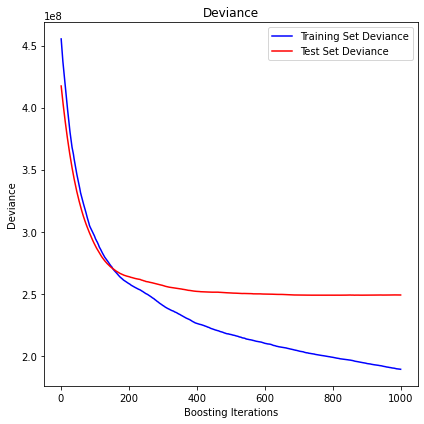

In [22]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

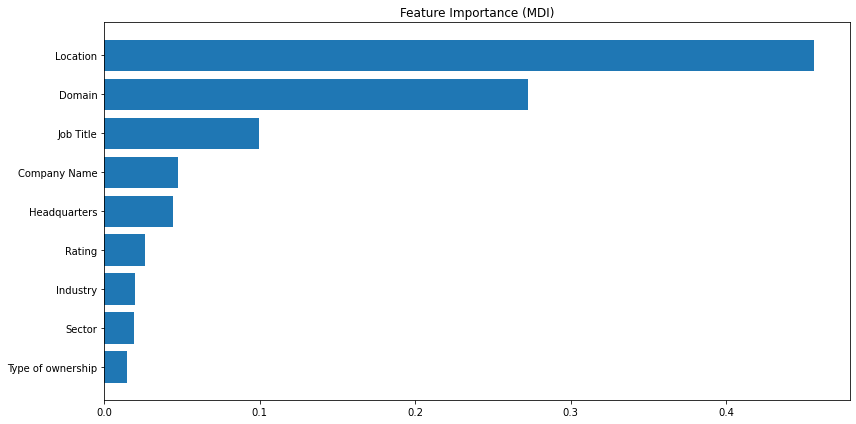

In [23]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()

### 8. Gradient boost with cross validation

##### 8.1 Create a grid for parameter tuning and define a random forest regressor with cross validation

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators':[200,500,1000], 
              'max_depth':[4,6],
              'min_samples_split':[3,5], 
              'learning_rate': [0.1,0.05,0.01],
              'loss':['huber', 'ls'] } 

# Create a based model
gb_reg_base = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb_reg_base, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

##### 8.2 Find the best parameter

In [25]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
params_best = grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [37]:
params_best

{'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 6,
 'min_samples_split': 3,
 'n_estimators': 500}

##### 8.3 Print the evaluation

In [26]:
best_grid = grid_search.best_estimator_

test_pred = best_grid.predict(X_test)
train_pred = best_grid.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17948.38935324415
MSE: 579198485.1287751
RMSE: 24066.54285785092
R2 Square 0.44124794549014257
Train set evaluation:
_____________________________________
MAE: 16309.196596185164
MSE: 469713276.6200972
RMSE: 21672.86959818882
R2 Square 0.5269260465869174


In [27]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,17948.389353,5.791985e+08,24066.542858,0.441248,"[0.08503370141584066, 0.17334835008426452, -0...."


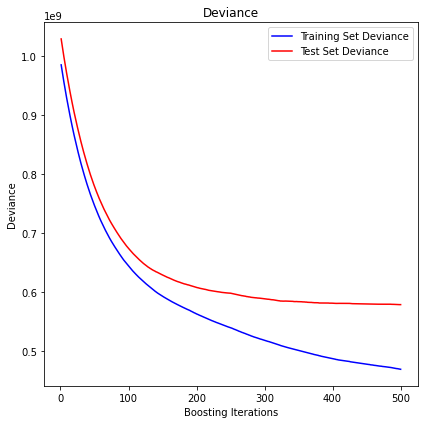

In [29]:
test_score = np.zeros((params_best['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(best_grid.staged_predict(X_test)):
    test_score[i] = best_grid.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params_best['n_estimators']) + 1, best_grid.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params_best['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

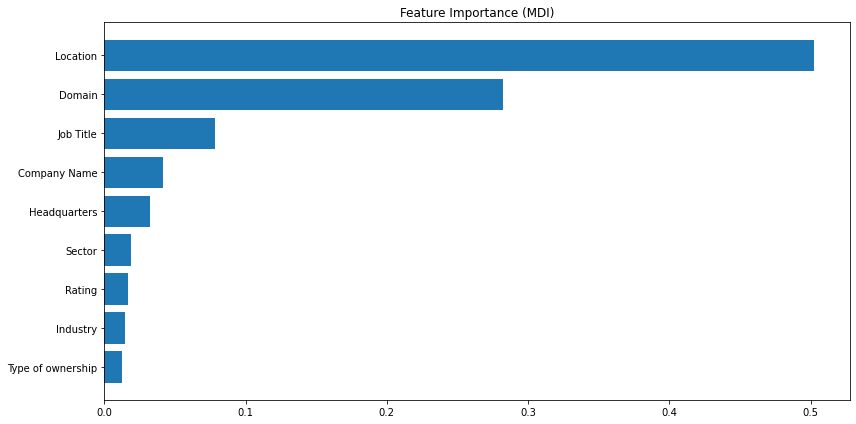

In [30]:
feature_importance = best_grid.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()

# ------------------------------CONCLUSION-------------------------------------

1. Out of all regressors, random forest regressor with cross validation can produce the best performance on the testing data set with the R2 Square of 0.463
2. Out of all features, location and domain demonstate the most importance